In [1202]:
import pandas as pd
import lxml
from bs4 import BeautifulSoup
import re
from selenium import webdriver
import chromedriver_binary
import string
import requests
from datetime import datetime
import numpy as np

# Yahoo Finance

In [1203]:
#Input stock ticker:
stock="XPEV"

In [1204]:
stock_financials = 'https://finance.yahoo.com/quote/'+stock+'/financials?p='+stock
stock_historic='https://finance.yahoo.com/quote/'+stock+'/history?p='+stock

In [1205]:
stock_financials

'https://finance.yahoo.com/quote/XPEV/financials?p=XPEV'

In [1206]:
stock_historic

'https://finance.yahoo.com/quote/XPEV/history?p=XPEV'

In [1207]:
stock_price='https://finance.yahoo.com/quote/'+stock+'?p='+stock
stock_prevprice='https://finance.yahoo.com/quote/'+stock+'/history?p='+stock

In [1208]:
stock_price

'https://finance.yahoo.com/quote/XPEV?p=XPEV'

In [1209]:
print(stock_price)

https://finance.yahoo.com/quote/XPEV?p=XPEV


In [1210]:
print(stock_prevprice)

https://finance.yahoo.com/quote/XPEV/history?p=XPEV


In [1211]:
price=requests.get(stock_price)
print(price)

<Response [200]>


In [1212]:
priceN=requests.get(stock_prevprice)
print(priceN)

<Response [200]>


In [1213]:
soup=BeautifulSoup(price.text,"html.parser")
print(soup.title.string)

XPeng Inc. (XPEV) Stock Price, News, Quote & History - Yahoo Finance


In [1214]:
price1=soup.find(class_='Ta(end) Fw(600) Lh(14px)')
tr_all=price1.find_all('span',{'class':'Trsdu(0.3s)'})
print(stock+" Previous Closing Price:{0}".format(tr_all[0].get_text()))

XPEV Previous Closing Price:38.61


In [1215]:
soup=BeautifulSoup(priceN.text,"html.parser")
print(soup.title.string)

XPeng Inc. (XPEV) Stock Historical Prices & Data - Yahoo Finance


In [1216]:
price2=soup.find(class_='W(100%) M(0)')
tr_allm1=price2.find_all('tr',{'class':'BdT Bdc($seperatorColor) Ta(end) Fz(s) Whs(nw)'})
preciom1=tr_allm1[2].find('td',{'class':'Py(10px) Pstart(10px)'})
print(stock+" Previous Closing Price T-1:{0}".format(preciom1.get_text()))

XPEV Previous Closing Price T-1:40.10


In [1217]:
precio_cierre=tr_all[0].get_text()

In [1218]:
precio_cierrem1=preciom1.get_text()

In [1219]:
from decimal import Decimal
Decimal(precio_cierre)

Decimal('38.61')

In [1220]:
bla = Decimal(precio_cierre) - Decimal(precio_cierrem1) / Decimal(precio_cierrem1)

In [1221]:
retorno = (eval(precio_cierre)-eval(precio_cierrem1))/eval(precio_cierrem1)

In [1222]:
type(retorno)

float

In [1223]:
#Este es el retorno que queremos correlacionar con en "Sentiment Analysis"
retorno1=round(retorno,6)
print(retorno1)

-0.037157


In [1224]:
tablaprecio='https://finance.yahoo.com/quote/'+stock+'/history?p='+stock

In [1225]:
page=requests.get(tablaprecio)

In [1226]:
pricehist=pd.read_html(tablaprecio)

In [1227]:
table=pricehist[0]

In [1228]:
table

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Jun 11, 2021",38.90,41.77,38.69,41.35,41.35,17156360
1,"Jun 10, 2021",38.20,39.17,38.03,38.61,38.61,9913900
2,"Jun 09, 2021",40.10,40.24,37.77,38.07,38.07,13997800
3,"Jun 08, 2021",38.97,40.16,38.69,39.65,39.65,21313500
4,"Jun 07, 2021",37.07,38.77,36.69,38.36,38.36,14478900
...,...,...,...,...,...,...,...
96,"Jan 25, 2021",58.47,60.04,51.66,54.65,54.65,23297900
97,"Jan 22, 2021",54.58,57.58,54.20,56.39,56.39,22148300
98,"Jan 21, 2021",53.30,55.68,50.53,54.31,54.31,21380100
99,"Jan 20, 2021",55.97,58.37,50.81,52.46,52.46,32728400


In [1229]:
df=pd.DataFrame(table)

In [1230]:
type(df)

pandas.core.frame.DataFrame

In [1231]:
df2=df.head(99)

In [1232]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         99 non-null     object
 1   Open         99 non-null     object
 2   High         99 non-null     object
 3   Low          99 non-null     object
 4   Close*       99 non-null     object
 5   Adj Close**  99 non-null     object
 6   Volume       99 non-null     object
dtypes: object(7)
memory usage: 5.5+ KB


In [1233]:
print(df2.dtypes)

Date           object
Open           object
High           object
Low            object
Close*         object
Adj Close**    object
Volume         object
dtype: object


In [1234]:
df2.iloc[0][0]

'Jun 11, 2021'

In [1235]:
df['Date']=pd.to_datetime(df['Date'],errors='coerce')

In [1236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         100 non-null    datetime64[ns]
 1   Open         101 non-null    object        
 2   High         101 non-null    object        
 3   Low          101 non-null    object        
 4   Close*       101 non-null    object        
 5   Adj Close**  101 non-null    object        
 6   Volume       101 non-null    object        
dtypes: datetime64[ns](1), object(6)
memory usage: 5.6+ KB


In [1237]:
df.rename(columns={'Date':'date'},inplace=True)

In [1238]:
df

,date,Open,High,Low,Close*,Adj Close**,Volume
0,2021-06-11,38.90,41.77,38.69,41.35,41.35,17156360
1,2021-06-10,38.20,39.17,38.03,38.61,38.61,9913900
2,2021-06-09,40.10,40.24,37.77,38.07,38.07,13997800
3,2021-06-08,38.97,40.16,38.69,39.65,39.65,21313500
4,2021-06-07,37.07,38.77,36.69,38.36,38.36,14478900
...,...,...,...,...,...,...,...
96,2021-01-25,58.47,60.04,51.66,54.65,54.65,23297900
97,2021-01-22,54.58,57.58,54.20,56.39,56.39,22148300
98,2021-01-21,53.30,55.68,50.53,54.31,54.31,21380100
99,2021-01-20,55.97,58.37,50.81,52.46,52.46,32728400


In [1239]:
df.set_index('date',inplace=True)

In [1240]:
df.index.name = 'Date'

In [1241]:
df

,Open,High,Low,Close*,Adj Close**,Volume
Date,,,,,,
2021-06-11,38.90,41.77,38.69,41.35,41.35,17156360
2021-06-10,38.20,39.17,38.03,38.61,38.61,9913900
2021-06-09,40.10,40.24,37.77,38.07,38.07,13997800
2021-06-08,38.97,40.16,38.69,39.65,39.65,21313500
2021-06-07,37.07,38.77,36.69,38.36,38.36,14478900
...,...,...,...,...,...,...
2021-01-25,58.47,60.04,51.66,54.65,54.65,23297900
2021-01-22,54.58,57.58,54.20,56.39,56.39,22148300
2021-01-21,53.30,55.68,50.53,54.31,54.31,21380100


# FinViz News Analyzer

In [1242]:
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
finwiz_url = 'https://finviz.com/quote.ashx?t='
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\pablosilva\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [1243]:
news_tables = {}
tickers = [stock]

for ticker in tickers:
    url = finwiz_url + ticker
    req = Request(url=url,headers={'user-agent': 'my-app/0.0.1'}) 
    response = urlopen(req)    
    html = BeautifulSoup(response)
    news_table = html.find(id='news-table')
    news_tables[ticker] = news_table

In [1244]:
parsed_news = []

for file_name, news_table in news_tables.items():
    for x in news_table.findAll('tr'):
        text = x.a.get_text() 
        date_scrape = x.td.text.split()

        if len(date_scrape) == 1:
            time = date_scrape[0]
            
        else:
            date = date_scrape[0]
            time = date_scrape[1]
        ticker = file_name.split('_')[0]
        
        parsed_news.append([ticker, date, time, text])

In [1245]:
parsed_news

[['XPEV', 'Jun-11-21', '01:47PM', 'Top Electric Car Stocks for Q3 2021'],
 ['XPEV',
  'Jun-10-21',
  '07:06AM',
  "With China EV Stock XPeng, It's Buyer Beware"],
 ['XPEV',
  'Jun-10-21',
  '02:30AM',
  'Electric Vehicle Checkpoint: Jim Cramer on Lordstown Losses, Ford Momentum'],
 ['XPEV',
  'Jun-08-21',
  '07:00PM',
  'How A 100 Year Old Science Experiment Helped Create The Fuel Of The Future'],
 ['XPEV',
  'Jun-08-21',
  '04:06PM',
  'Tesla Stock Hits Resistance Even As China Sales Roar Back In May'],
 ['XPEV', 'Jun-08-21', '03:56PM', 'Top Car Stocks for Q3 2021'],
 ['XPEV',
  'Jun-07-21',
  '09:26AM',
  'EV Investors Driven Toward Xpengs Growth Potential'],
 ['XPEV',
  'Jun-04-21',
  '01:58PM',
  'Li Auto Should Be Worth $30.21, 21% More Than Its Current Price'],
 ['XPEV',
  'Jun-03-21',
  '04:03PM',
  'Tesla Stock Tumbles Below Key Level As China Demand Reportedly Crashes'],
 ['XPEV',
  'Jun-03-21',
  '04:00AM',
  'Electric Vehicle Checkpoint: Tesla, NIO, Ford Cite Supply Costs as

In [1246]:
try:
    vader = SentimentIntensityAnalyzer()
except LookupError:
    nltk.download('vader_lexicon')
    vader = SentimentIntensityAnalyzer()

columns = ['ticker', 'date', 'time', 'headline']

parsed_and_scored_news = pd.DataFrame(parsed_news, columns=columns)

scores = parsed_and_scored_news['headline'].apply(vader.polarity_scores).tolist()

scores_df = pd.DataFrame(scores)

pd.options.display.float_format = "{:,.3f}".format

parsed_and_scored_news = parsed_and_scored_news.join(scores_df, rsuffix='_right')

parsed_and_scored_news['date'] = pd.to_datetime(parsed_and_scored_news.date).dt.date

parsed_and_scored_news.head(10)

,ticker,date,time,headline,neg,neu,pos,compound
0,XPEV,2021-06-11,01:47PM,Top Electric Car Stocks for Q3 2021,0.000,0.769,0.231,0.202
1,XPEV,2021-06-10,07:06AM,"With China EV Stock XPeng, It's Buyer Beware",0.000,1.000,0.000,0.000
2,XPEV,2021-06-10,02:30AM,Electric Vehicle Checkpoint: Jim Cramer on Lor...,0.231,0.769,0.000,-0.402
3,XPEV,2021-06-08,07:00PM,How A 100 Year Old Science Experiment Helped C...,0.000,0.851,0.149,0.273
4,XPEV,2021-06-08,04:06PM,Tesla Stock Hits Resistance Even As China Sale...,0.000,1.000,0.000,0.000
5,XPEV,2021-06-08,03:56PM,Top Car Stocks for Q3 2021,0.000,0.735,0.265,0.202
6,XPEV,2021-06-07,09:26AM,EV Investors Driven Toward Xpengs Growth Poten...,0.000,0.698,0.302,0.382
7,XPEV,2021-06-04,01:58PM,"Li Auto Should Be Worth $30.21, 21% More Than ...",0.000,0.853,0.147,0.226
8,XPEV,2021-06-03,04:03PM,Tesla Stock Tumbles Below Key Level As China D...,0.130,0.870,0.000,-0.128
9,XPEV,2021-06-03,04:00AM,"Electric Vehicle Checkpoint: Tesla, NIO, Ford ...",0.000,0.885,0.115,0.077


In [1247]:
df1=pd.DataFrame(parsed_and_scored_news)

In [1248]:
type(df1)

pandas.core.frame.DataFrame

In [1249]:
print([parsed_and_scored_news.iloc[0][7],retorno1])

[0.2023, -0.037157]


In [1250]:
parsed_and_scored_news.iloc[0][1]

datetime.date(2021, 6, 11)

In [1251]:
from datetime import datetime, timedelta

In [1252]:
d = datetime.today() - timedelta(days=1)

In [1253]:
days=parsed_and_scored_news.iloc[0][1]-timedelta(days=2)

In [1254]:
print(days)

2021-06-09


In [1255]:
parsed_and_scored_news[parsed_and_scored_news.date==days]

,ticker,date,time,headline,neg,neu,pos,compound


In [1256]:
df1

,ticker,date,time,headline,neg,neu,pos,compound
0,XPEV,2021-06-11,01:47PM,Top Electric Car Stocks for Q3 2021,0.000,0.769,0.231,0.202
1,XPEV,2021-06-10,07:06AM,"With China EV Stock XPeng, It's Buyer Beware",0.000,1.000,0.000,0.000
2,XPEV,2021-06-10,02:30AM,Electric Vehicle Checkpoint: Jim Cramer on Lor...,0.231,0.769,0.000,-0.402
3,XPEV,2021-06-08,07:00PM,How A 100 Year Old Science Experiment Helped C...,0.000,0.851,0.149,0.273
4,XPEV,2021-06-08,04:06PM,Tesla Stock Hits Resistance Even As China Sale...,0.000,1.000,0.000,0.000
...,...,...,...,...,...,...,...,...
95,XPEV,2021-04-05,04:11PM,"Nio Stock, China EV Stocks Reverse Despite Str...",0.178,0.726,0.095,-0.309
96,XPEV,2021-04-05,12:56PM,Biden's electric vehicle ambitions may send Te...,0.000,1.000,0.000,0.000
97,XPEV,2021-04-05,09:31AM,Teslas Q1 report is a game changer: analyst,0.000,1.000,0.000,0.000
98,XPEV,2021-04-05,09:15AM,Tesla shares spike after company posts record ...,0.000,0.833,0.167,0.296


In [1257]:
df1['compound'].mean()

0.101295

In [1258]:
df1bydate=df1.groupby('date')

In [1259]:
df1bydate.mean()

,neg,neu,pos,compound
date,,,,
2021-04-01,0.000,1.000,0.000,0.000
2021-04-05,0.067,0.881,0.052,-0.054
2021-04-06,0.000,1.000,0.000,0.000
2021-04-07,0.167,0.833,0.000,-0.421
2021-04-08,0.018,0.884,0.098,0.162
2021-04-09,0.000,0.704,0.296,0.637
2021-04-10,0.000,1.000,0.000,0.000
2021-04-12,0.000,0.859,0.141,0.241
2021-04-13,0.000,1.000,0.000,0.000


In [1260]:
df1.iloc[0][1]

datetime.date(2021, 6, 11)

# FinViz + Yahoo Finance

In [1261]:
df1.head()

,ticker,date,time,headline,neg,neu,pos,compound
0,XPEV,2021-06-11,01:47PM,Top Electric Car Stocks for Q3 2021,0.000,0.769,0.231,0.202
1,XPEV,2021-06-10,07:06AM,"With China EV Stock XPeng, It's Buyer Beware",0.000,1.000,0.000,0.000
2,XPEV,2021-06-10,02:30AM,Electric Vehicle Checkpoint: Jim Cramer on Lor...,0.231,0.769,0.000,-0.402
3,XPEV,2021-06-08,07:00PM,How A 100 Year Old Science Experiment Helped C...,0.000,0.851,0.149,0.273
4,XPEV,2021-06-08,04:06PM,Tesla Stock Hits Resistance Even As China Sale...,0.000,1.000,0.000,0.000


In [1262]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ticker    100 non-null    object 
 1   date      100 non-null    object 
 2   time      100 non-null    object 
 3   headline  100 non-null    object 
 4   neg       100 non-null    float64
 5   neu       100 non-null    float64
 6   pos       100 non-null    float64
 7   compound  100 non-null    float64
dtypes: float64(4), object(4)
memory usage: 6.4+ KB


In [1263]:
df1['date']=pd.to_datetime(df1['date'])

In [1264]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   ticker    100 non-null    object        
 1   date      100 non-null    datetime64[ns]
 2   time      100 non-null    object        
 3   headline  100 non-null    object        
 4   neg       100 non-null    float64       
 5   neu       100 non-null    float64       
 6   pos       100 non-null    float64       
 7   compound  100 non-null    float64       
dtypes: datetime64[ns](1), float64(4), object(3)
memory usage: 6.4+ KB


In [1265]:
df1.set_index('date',inplace=True)

In [1266]:
df1bydate=df1.groupby('date')

In [1267]:
df1bydate.head()

,ticker,time,headline,neg,neu,pos,compound
date,,,,,,,
2021-06-11,XPEV,01:47PM,Top Electric Car Stocks for Q3 2021,0.000,0.769,0.231,0.202
2021-06-10,XPEV,07:06AM,"With China EV Stock XPeng, It's Buyer Beware",0.000,1.000,0.000,0.000
2021-06-10,XPEV,02:30AM,Electric Vehicle Checkpoint: Jim Cramer on Lor...,0.231,0.769,0.000,-0.402
2021-06-08,XPEV,07:00PM,How A 100 Year Old Science Experiment Helped C...,0.000,0.851,0.149,0.273
2021-06-08,XPEV,04:06PM,Tesla Stock Hits Resistance Even As China Sale...,0.000,1.000,0.000,0.000
...,...,...,...,...,...,...,...
2021-04-05,XPEV,04:11PM,"Nio Stock, China EV Stocks Reverse Despite Str...",0.178,0.726,0.095,-0.309
2021-04-05,XPEV,12:56PM,Biden's electric vehicle ambitions may send Te...,0.000,1.000,0.000,0.000
2021-04-05,XPEV,09:31AM,Teslas Q1 report is a game changer: analyst,0.000,1.000,0.000,0.000


In [1268]:
df

,Open,High,Low,Close*,Adj Close**,Volume
Date,,,,,,
2021-06-11,38.90,41.77,38.69,41.35,41.35,17156360
2021-06-10,38.20,39.17,38.03,38.61,38.61,9913900
2021-06-09,40.10,40.24,37.77,38.07,38.07,13997800
2021-06-08,38.97,40.16,38.69,39.65,39.65,21313500
2021-06-07,37.07,38.77,36.69,38.36,38.36,14478900
...,...,...,...,...,...,...
2021-01-25,58.47,60.04,51.66,54.65,54.65,23297900
2021-01-22,54.58,57.58,54.20,56.39,56.39,22148300
2021-01-21,53.30,55.68,50.53,54.31,54.31,21380100


In [1269]:
#df1bydate=pd.DataFrame(df1bydate)
sentimientos_promedios = df1bydate.mean()

In [1270]:
sentimientos_promedios.index.name = 'Date'

In [1271]:
#df1bydate.columns=["Date","Ticker","Time","Headline","Negative","Neutral","Positive","Compound Sum"]
#df1bydate.rename(columns = {'$b':'B'}, inplace = True)
#df1bydate.columns[0]="Date"
sentimientos_promedios

,neg,neu,pos,compound
Date,,,,
2021-04-01,0.000,1.000,0.000,0.000
2021-04-05,0.067,0.881,0.052,-0.054
2021-04-06,0.000,1.000,0.000,0.000
2021-04-07,0.167,0.833,0.000,-0.421
2021-04-08,0.018,0.884,0.098,0.162
2021-04-09,0.000,0.704,0.296,0.637
2021-04-10,0.000,1.000,0.000,0.000
2021-04-12,0.000,0.859,0.141,0.241
2021-04-13,0.000,1.000,0.000,0.000


In [1272]:
nuevo = pd.merge(df,sentimientos_promedios,how='inner',on='Date')

In [1273]:
nuevo

,Open,High,Low,Close*,Adj Close**,Volume,neg,neu,pos,compound
Date,,,,,,,,,,
2021-06-11,38.90,41.77,38.69,41.35,41.35,17156360,0.000,0.769,0.231,0.202
2021-06-10,38.20,39.17,38.03,38.61,38.61,9913900,0.116,0.885,0.000,-0.201
2021-06-08,38.97,40.16,38.69,39.65,39.65,21313500,0.000,0.862,0.138,0.159
2021-06-07,37.07,38.77,36.69,38.36,38.36,14478900,0.000,0.698,0.302,0.382
2021-06-04,36.37,37.72,35.90,37.11,37.11,13146000,0.000,0.853,0.147,0.226
2021-06-03,34.84,37.06,34.28,35.95,35.95,15989700,0.065,0.877,0.058,-0.025
2021-06-02,34.50,36.23,34.15,35.00,35.00,17256700,0.000,0.922,0.078,0.171
2021-06-01,33.70,34.77,33.04,34.60,34.60,21612000,0.000,0.946,0.054,0.111
2021-05-28,32.17,33.09,31.85,32.13,32.13,9713300,0.056,0.829,0.115,0.051


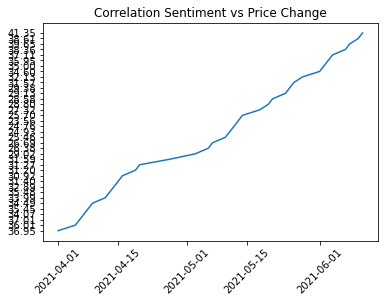

In [1274]:
fig, ax = plt.subplots()
ax.plot(nuevo.index.values, nuevo['Adj Close**'])

#Título
ax.set_title('Correlation Sentiment vs Price Change')

#Precio invertir
plt.ylim(reversed(plt.ylim()))

#Modificar Fecha
plt.xticks(rotation=45) 

plt.show()

In [1275]:
import numpy as np

In [1276]:
prueba1=nuevo

In [1277]:
type(prueba1)

pandas.core.frame.DataFrame

In [1278]:
prueba1['Open']=pd.to_numeric(prueba1['Open'])
prueba1['High']=pd.to_numeric(prueba1['High'])
prueba1['Low']=pd.to_numeric(prueba1['Low'])
prueba1['Close*']=pd.to_numeric(prueba1['Close*'])
prueba1['Adj Close**']=pd.to_numeric(prueba1['Adj Close**'])
prueba1['Volume']=pd.to_numeric(prueba1['Volume'])

In [1279]:
prueba1

,Open,High,Low,Close*,Adj Close**,Volume,neg,neu,pos,compound
Date,,,,,,,,,,
2021-06-11,38.900,41.770,38.690,41.350,41.350,17156360,0.000,0.769,0.231,0.202
2021-06-10,38.200,39.170,38.030,38.610,38.610,9913900,0.116,0.885,0.000,-0.201
2021-06-08,38.970,40.160,38.690,39.650,39.650,21313500,0.000,0.862,0.138,0.159
2021-06-07,37.070,38.770,36.690,38.360,38.360,14478900,0.000,0.698,0.302,0.382
2021-06-04,36.370,37.720,35.900,37.110,37.110,13146000,0.000,0.853,0.147,0.226
2021-06-03,34.840,37.060,34.280,35.950,35.950,15989700,0.065,0.877,0.058,-0.025
2021-06-02,34.500,36.230,34.150,35.000,35.000,17256700,0.000,0.922,0.078,0.171
2021-06-01,33.700,34.770,33.040,34.600,34.600,21612000,0.000,0.946,0.054,0.111
2021-05-28,32.170,33.090,31.850,32.130,32.130,9713300,0.056,0.829,0.115,0.051


In [1280]:
print(prueba1.dtypes)

Open           float64
High           float64
Low            float64
Close*         float64
Adj Close**    float64
Volume           int64
neg            float64
neu            float64
pos            float64
compound       float64
dtype: object


In [1281]:
prueba1['Diferencia']=(prueba1['Close*']-prueba1['Open'])/prueba1['Open']
prueba1['Compound/2']=(prueba1['compound']/4)

In [1282]:
prueba1

,Open,High,Low,Close*,Adj Close**,Volume,neg,neu,pos,compound,Diferencia,Compound/2
Date,,,,,,,,,,,,
2021-06-11,38.900,41.770,38.690,41.350,41.350,17156360,0.000,0.769,0.231,0.202,0.063,0.051
2021-06-10,38.200,39.170,38.030,38.610,38.610,9913900,0.116,0.885,0.000,-0.201,0.011,-0.050
2021-06-08,38.970,40.160,38.690,39.650,39.650,21313500,0.000,0.862,0.138,0.159,0.017,0.040
2021-06-07,37.070,38.770,36.690,38.360,38.360,14478900,0.000,0.698,0.302,0.382,0.035,0.095
2021-06-04,36.370,37.720,35.900,37.110,37.110,13146000,0.000,0.853,0.147,0.226,0.020,0.057
2021-06-03,34.840,37.060,34.280,35.950,35.950,15989700,0.065,0.877,0.058,-0.025,0.032,-0.006
2021-06-02,34.500,36.230,34.150,35.000,35.000,17256700,0.000,0.922,0.078,0.171,0.014,0.043
2021-06-01,33.700,34.770,33.040,34.600,34.600,21612000,0.000,0.946,0.054,0.111,0.027,0.028
2021-05-28,32.170,33.090,31.850,32.130,32.130,9713300,0.056,0.829,0.115,0.051,-0.001,0.013


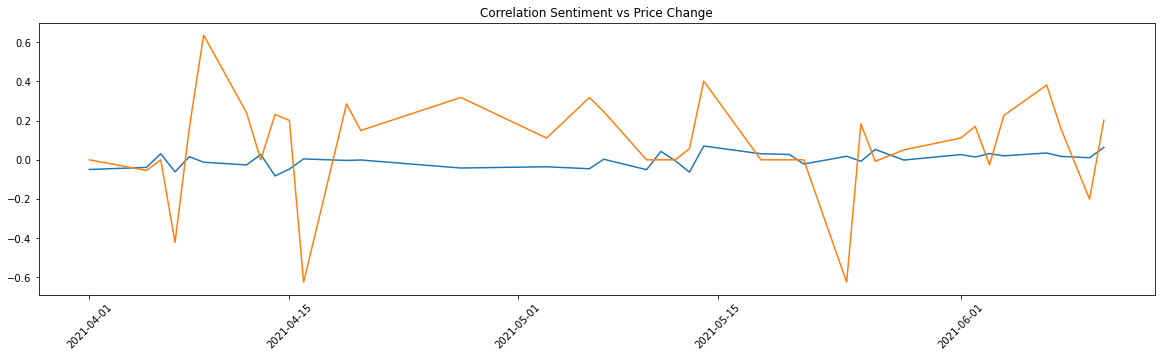

In [1283]:
fig, ax = plt.subplots(figsize=(20,5))
ax.plot(nuevo.index.values, prueba1['Diferencia'],prueba1['compound'])

#Título
ax.set_title('Correlation Sentiment vs Price Change')

#Modificar Fecha
plt.xticks(rotation=45) 

plt.show()

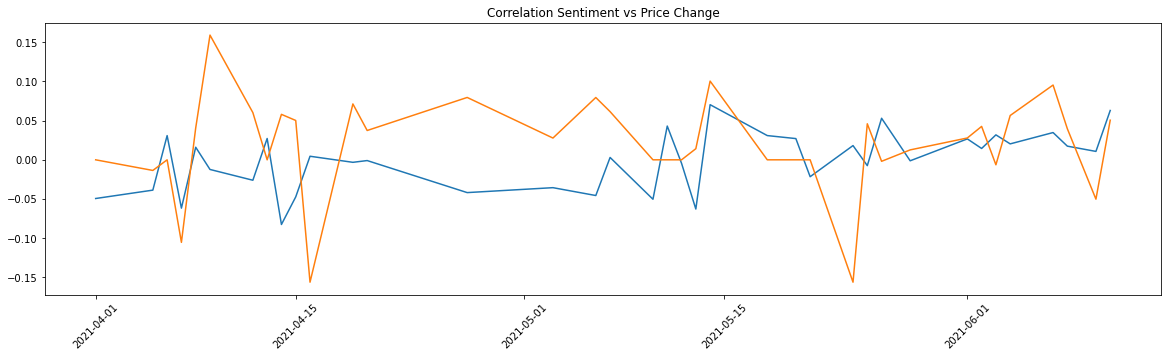

In [1284]:
fig, ax = plt.subplots(figsize=(20,5))
ax.plot(nuevo.index.values, prueba1['Diferencia'],prueba1['Compound/2'])

#Título
ax.set_title('Correlation Sentiment vs Price Change')

#Modificar Fecha
plt.xticks(rotation=45) 

plt.show()